In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Drop unwanted columns
df.drop('CustomerID', axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

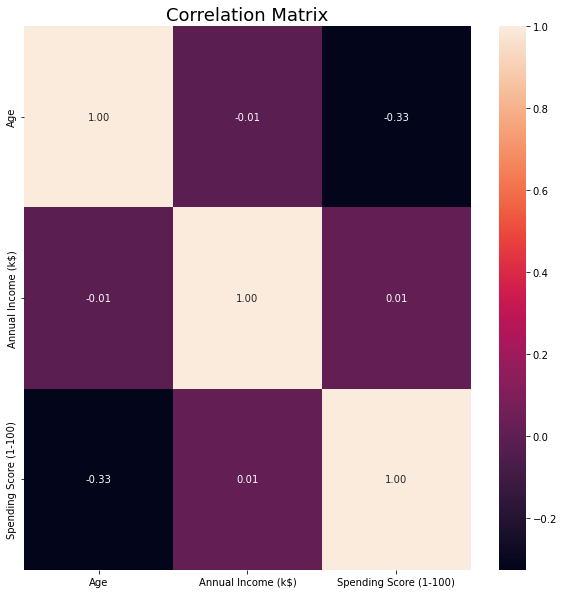

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Gender'])))

In [11]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

x['Gender'] = label.fit_transform(df['Gender'])

## Dimensionality Reduction

- The higher the number of features, the harder it is to work with
- Many features are correlated, hence redundant
- Reduce the number of random variables to obtain principal variables

### Pricipal Component Analysis(PCA)
- reduce dimensionality 
- increase interpretability while minimizing information loss

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(x))
df_pca.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2
0,-0.600438,-1.737179,1.322247
1,-1.649886,-1.789124,0.067789
2,0.315381,-1.692772,2.179818
3,-1.477989,-1.781317,0.078518
4,-0.060545,-1.678691,0.688083


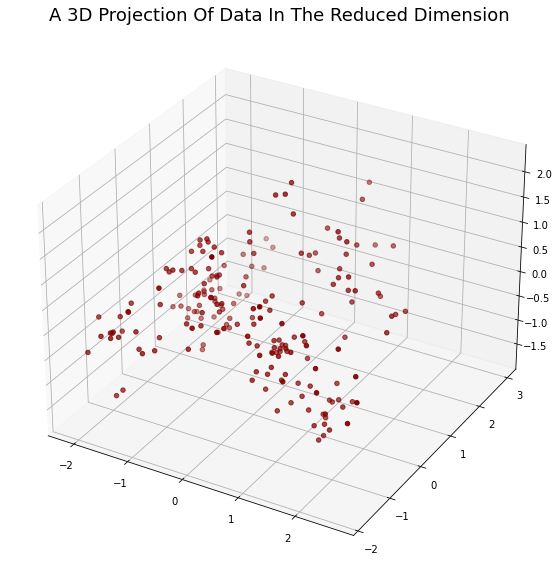

In [14]:
# 3D projection of Data in Reducedk Dimension

x= df_pca[0]
y= df_pca[1]
z= df_pca[2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension", fontsize=18)
plt.show()

Elbow Method to determine the number of clusters to be formed:


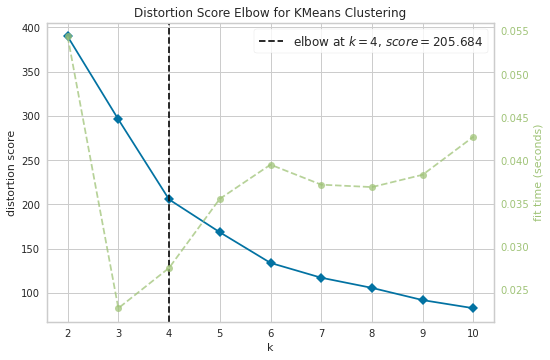

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)
yhat_ac = AC.fit_predict(df_pca)
df_pca['Clusters'] = yhat_ac

df['Clusters'] = yhat_ac

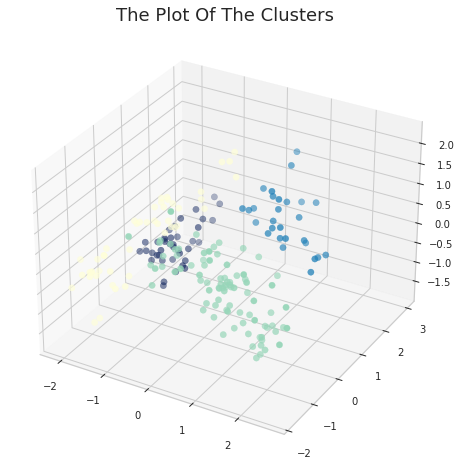

In [23]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o', cmap='YlGnBu')
ax.set_title("The Plot Of The Clusters", fontsize=18)
plt.show()

Text(0.5, 1.0, 'Distribution of the Clusters')

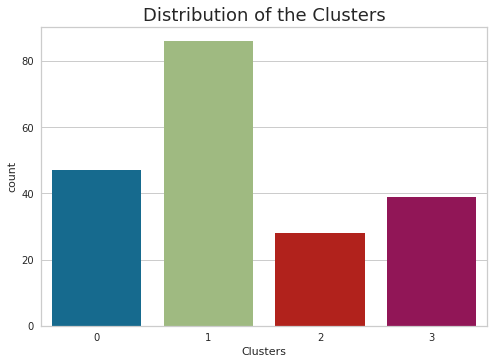

In [24]:
sns.countplot(x=df['Clusters'])
plt.title('Distribution of the Clusters', fontsize=18)